<h1><center><font size=6>Global CO2 emission analysis (CO2 emission- metric tons per capita)</center></font></h1>

# **Introduction**
An analysis of global CO2 emissions with a specific focus on CO2 emissions per capita is a fundamental part of researching climate change and sustainability.
This analysis accounts for the amount of carbon dioxide emanating from the individuals in various countries on the globe. Thus, it helps to understand patterns present globally, the differences between these patterns within countries and regions, and the trends that prevail over time.

## **Objectives:**

The objectives of such analysis is as follows:
- Identify which countries or regions have the highest per capita emissions.
- Compare emissions across different regions to understand the impact of economic development, urbanization, and natural factors on CO2 emissions.
- Understand the regional variability of the CO2 emissions
- Forcast the CO2 emission for the USA using the ARIMA model from 2021 - 2025

In [1]:
# Mounting the drive in google colab (should be commented out when working on a local machine)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing essential libraries & the dataset:**

In [3]:
# importing libraries.
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [8]:
# Importing the data set in google colab
data = pd.read_excel('/content/drive/MyDrive/Copilot/World_Bank_CO2.xlsx')

In [9]:
df=data.copy()

In [10]:
data.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.00,1961.00,1962.00,1963.00,1964.00,1965.00,...,2014.00,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,2022.00,2023.00
3,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.01,0.96,0.94,0.93,0.92,0.92,0.80,NaN,NaN,NaN


In [11]:
# Let's start with the 'Data' sheet for data cleaning

# Load the 'Data' sheet specifically, skipping the first 3 rows as they contain metadata and headers
data_clean = pd.read_excel('/content/drive/MyDrive/Copilot/World_Bank_CO2.xlsx', sheet_name='Data', skiprows=3)

# Display the first few rows to verify loading and identify any obvious cleaning needs
data_clean.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.01,0.96,0.94,0.93,0.92,0.92,0.80,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.28,0.30,0.27,0.28,0.30,0.30,0.22,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.49,0.48,0.48,0.47,0.48,0.49,0.46,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.09,1.13,1.01,0.83,0.76,0.75,0.59,NaN,NaN,NaN


In [14]:
data_clean.shape

(266, 68)

## **Observations:**
- There are many missing values, especially in the earlier years (1960 onwards) and the most recent years (2021-2023).
- All rows appear to contain the same indicator, "CO2 emissions (metric tons per capita)", which means we don't have to filter by indicator for this analysis.
- The dataset includes aggregate regions (e.g., "Africa Eastern and Southern", "Africa Western and Central") alongside individual countries.

## **Remove Aggregate Regions**
To focus on country-level data, we can remove rows corresponding to aggregate regions. This can be done by identifying rows where the "Country Code" is not an ISO alpha-3 country code.

In [19]:
# Remove Aggregate Regions
country_data = data_clean[data_clean['Country Code'].str.match('^[A-Z]{3}$', na=False)]

#Trim DataFrame by dropping 'Indicator Name' and 'Indicator Code' columns
country_data_cleaned = country_data.drop(columns=['Indicator Name', 'Indicator Code'])

# Display the cleaned data's first few rows and the shape to understand the extent of the cleaning
country_data_cleaned.head(), country_data_cleaned.shape


(                  Country Name Country Code  1960  1961  1962  1963  1964  \
 0                        Aruba          ABW   NaN   NaN   NaN   NaN   NaN   
 1  Africa Eastern and Southern          AFE   NaN   NaN   NaN   NaN   NaN   
 2                  Afghanistan          AFG   NaN   NaN   NaN   NaN   NaN   
 3   Africa Western and Central          AFW   NaN   NaN   NaN   NaN   NaN   
 4                       Angola          AGO   NaN   NaN   NaN   NaN   NaN   
 
    1965  1966  1967  ...  2014  2015  2016  2017  2018  2019  2020  2021  \
 0   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
 1   NaN   NaN   NaN  ...  1.01  0.96  0.94  0.93  0.92  0.92  0.80   NaN   
 2   NaN   NaN   NaN  ...  0.28  0.30  0.27  0.28  0.30  0.30  0.22   NaN   
 3   NaN   NaN   NaN  ...  0.49  0.48  0.48  0.47  0.48  0.49  0.46   NaN   
 4   NaN   NaN   NaN  ...  1.09  1.13  1.01  0.83  0.76  0.75  0.59   NaN   
 
    2022  2023  
 0   NaN   NaN  
 1   NaN   NaN  
 2   NaN   NaN 

In [13]:
country_data_cleaned.shape

(266, 66)

## **Observation:**
It looks like there was a misunderstanding in the removal of aggregate regions; the examples shown still include aggregate data. Let's correct this step, ensuring we only retain rows that likely represent individual countries by filtering out known aggregate regions more accurately.

In [15]:
# This list could be expanded based on further knowledge of World Bank country codes
aggregate_identifiers = ['AFE', 'AFW', 'WLD', 'EAS', 'EAP', 'EMU', 'EUU', 'FCS', 'HPC', 'IBD', 'IBT', 'IDB', 'IDX', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'MEA', 'MIC', 'MNA', 'NAC', 'OED', 'OSS', 'PSS', 'SAS', 'SSA', 'SSF', 'SST', 'UMC', 'WLD']
country_specific_data = country_data[~country_data['Country Code'].isin(aggregate_identifiers)]

# Display the cleaned data's first few rows and the shape to verify the correct filtering
country_specific_data.head(), country_specific_data.shape


(  Country Name Country Code                          Indicator Name  \
 0        Aruba          ABW  CO2 emissions (metric tons per capita)   
 2  Afghanistan          AFG  CO2 emissions (metric tons per capita)   
 4       Angola          AGO  CO2 emissions (metric tons per capita)   
 5      Albania          ALB  CO2 emissions (metric tons per capita)   
 6      Andorra          AND  CO2 emissions (metric tons per capita)   
 
    Indicator Code  1960  1961  1962  1963  1964  1965  ...  2014  2015  2016  \
 0  EN.ATM.CO2E.PC   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
 2  EN.ATM.CO2E.PC   NaN   NaN   NaN   NaN   NaN   NaN  ...  0.28  0.30  0.27   
 4  EN.ATM.CO2E.PC   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.09  1.13  1.01   
 5  EN.ATM.CO2E.PC   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.80  1.67  1.59   
 6  EN.ATM.CO2E.PC   NaN   NaN   NaN   NaN   NaN   NaN  ...  6.45  6.49  6.47   
 
    2017  2018  2019  2020  2021  2022  2023  
 0   NaN   NaN   NaN   NaN   Na

In [16]:
country_specific_data.shape

(235, 68)

## **Observations:**
- After correcting the filtering to remove aggregate regions, the dataset now contains data for 235 individual countries, with each row representing CO2 emissions (metric tons per capita) for one country.
- The columns span from 1960 to 2023, though many years have missing data, especially in the early and recent years.

## **Missing value treatment using the KNN inputation approach**
Given the challenges with KNN imputation for entirely missing columns, let's focus on a strategy that allows us to work effectively with the available data. We'll proceed with the KNN imputation for the years where we have at least some data available. This approach will help us maintain the integrity of the dataset while addressing missing values where it's feasible to do so.

We shall approach this by considereing the following steps
- Perform KNN imputation on the dataset excluding entirely missing columns.
- Reintegrate the imputed data into our dataset.

In [20]:
from sklearn.impute import KNNImputer

# Prepare the dataset for KNN imputation
# Removing non-numeric columns as KNN imputer works with numeric data
data_for_imputation = country_specific_data.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Identify columns that do not have all NaN values
columns_with_data = data_for_imputation.columns[data_for_imputation.notna().any()].tolist()

# Subset the dataset to include only these columns for imputation
data_subset_for_imputation = data_for_imputation[columns_with_data]

# Perform KNN imputation on this subset
imputed_data_subset = imputer.fit_transform(data_subset_for_imputation)

# Create a DataFrame from the imputed subset data
imputed_data_subset_df = pd.DataFrame(imputed_data_subset, columns=columns_with_data)

# Display the first few rows of the imputed subset to verify the imputation
imputed_data_subset_df.head()


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,4.35,4.23,4.19,4.14,4.12,4.10,4.18,4.21,4.20,4.18,...,4.41,4.41,4.37,4.27,4.21,4.19,4.19,4.18,4.13,3.84
1,0.19,0.18,0.13,0.11,0.10,0.09,0.08,0.08,0.07,0.06,...,0.41,0.34,0.30,0.28,0.30,0.27,0.28,0.30,0.30,0.22
2,0.55,0.55,0.54,0.71,0.84,0.91,1.07,1.09,1.09,1.11,...,0.98,0.95,1.03,1.09,1.13,1.01,0.83,0.76,0.75,0.59
3,1.84,1.26,0.69,0.64,0.65,0.61,0.62,0.47,0.58,0.96,...,1.77,1.57,1.66,1.80,1.67,1.59,1.88,1.85,1.75,1.54
4,7.59,7.34,7.10,6.94,6.66,6.75,7.08,7.19,7.53,7.81,...,6.96,6.86,6.67,6.45,6.49,6.47,6.30,6.59,6.29,5.78


## **Integrate the imputed data back with the country identifiers.**

In [22]:
# Since we retained the order of countries, we can directly insert the country identifiers into the imputed dataset
imputed_data_full = imputed_data_subset_df.copy()
imputed_data_full.insert(0, 'Country Code', country_specific_data['Country Code'].values)
imputed_data_full.insert(0, 'Country Name', country_specific_data['Country Name'].values)

# For years with entirely missing data (not included in the KNN imputation), we'll leave them as is since imputation wasn't applied
# This means our final dataset focuses on the years 1990-2020 for which we had at least some data and could apply KNN imputation

# Display the first few rows of the fully integrated dataset to verify successful integration
imputed_data_full.head()


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,4.35,4.23,4.19,4.14,4.12,4.10,4.18,4.21,...,4.41,4.41,4.37,4.27,4.21,4.19,4.19,4.18,4.13,3.84
1,Afghanistan,AFG,0.19,0.18,0.13,0.11,0.10,0.09,0.08,0.08,...,0.41,0.34,0.30,0.28,0.30,0.27,0.28,0.30,0.30,0.22
2,Angola,AGO,0.55,0.55,0.54,0.71,0.84,0.91,1.07,1.09,...,0.98,0.95,1.03,1.09,1.13,1.01,0.83,0.76,0.75,0.59
3,Albania,ALB,1.84,1.26,0.69,0.64,0.65,0.61,0.62,0.47,...,1.77,1.57,1.66,1.80,1.67,1.59,1.88,1.85,1.75,1.54
4,Andorra,AND,7.59,7.34,7.10,6.94,6.66,6.75,7.08,7.19,...,6.96,6.86,6.67,6.45,6.49,6.47,6.30,6.59,6.29,5.78


In [26]:
# Calculate the average emissions for each year across all countries
average_emissions_per_year = imputed_data_full.iloc[:, 2:].mean()

# Convert the series into a DataFrame for a clearer presentation
average_emissions_df = average_emissions_per_year.reset_index()
average_emissions_df.columns = ['Year', 'Average CO2 Emissions (metric tons per capita)']

average_emissions_df.head()


,Year,Average CO2 Emissions (metric tons per capita)
0,1990,4.33
1,1991,4.23
2,1992,4.19
3,1993,4.14
4,1994,4.12


In [27]:
# Display the summary statistics of the average emissions
average_emissions_df.describe()

,Average CO2 Emissions (metric tons per capita)
count,31.00
mean,4.27
std,0.15
min,3.84
25%,4.18
50%,4.23
75%,4.41
max,4.55


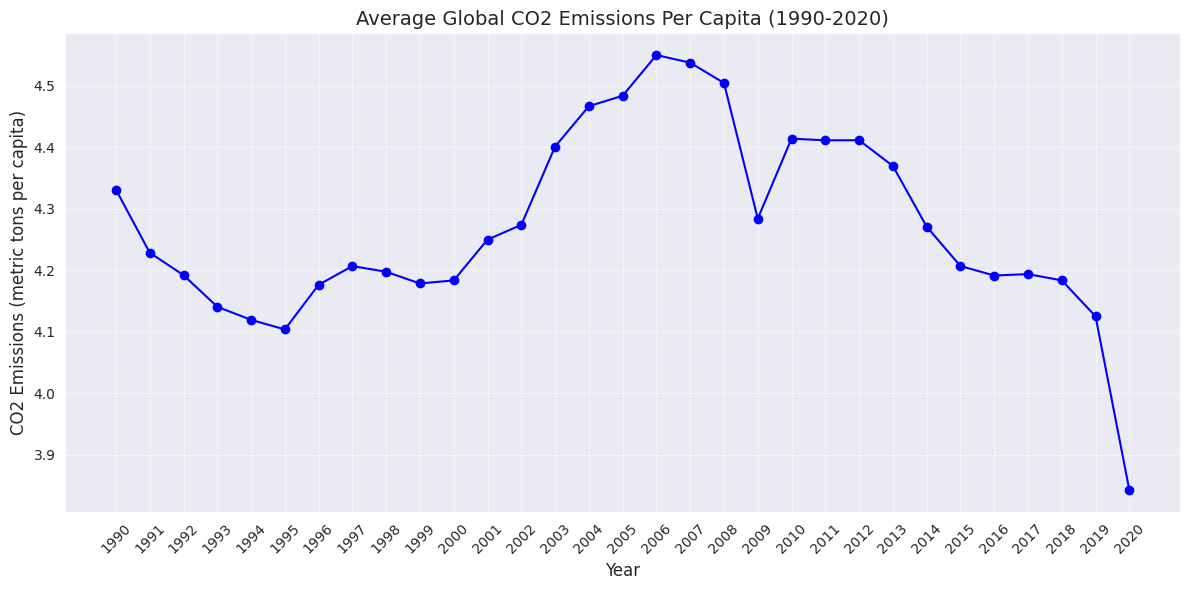

In [29]:
# Plotting the average global CO2 emissions per capita over time

plt.figure(figsize=(12, 6))
plt.plot(average_emissions_df['Year'], average_emissions_df['Average CO2 Emissions (metric tons per capita)'], marker='o', linestyle='-', color='blue')
plt.title('Average Global CO2 Emissions Per Capita (1990-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## **Comparing the CO2 emission trends in a devoloped country (USA) and a developing country (Ghana)**

The graph below compares CO2 emissions (metric tons per capita) between Ghana and the United States from 1990 to 2020. It illustrates the differences in emissions patterns between a high-income country (the United States) and a lower-middle-income country (Ghana), reflecting their respective industrial activities, energy use, and environmental policies.

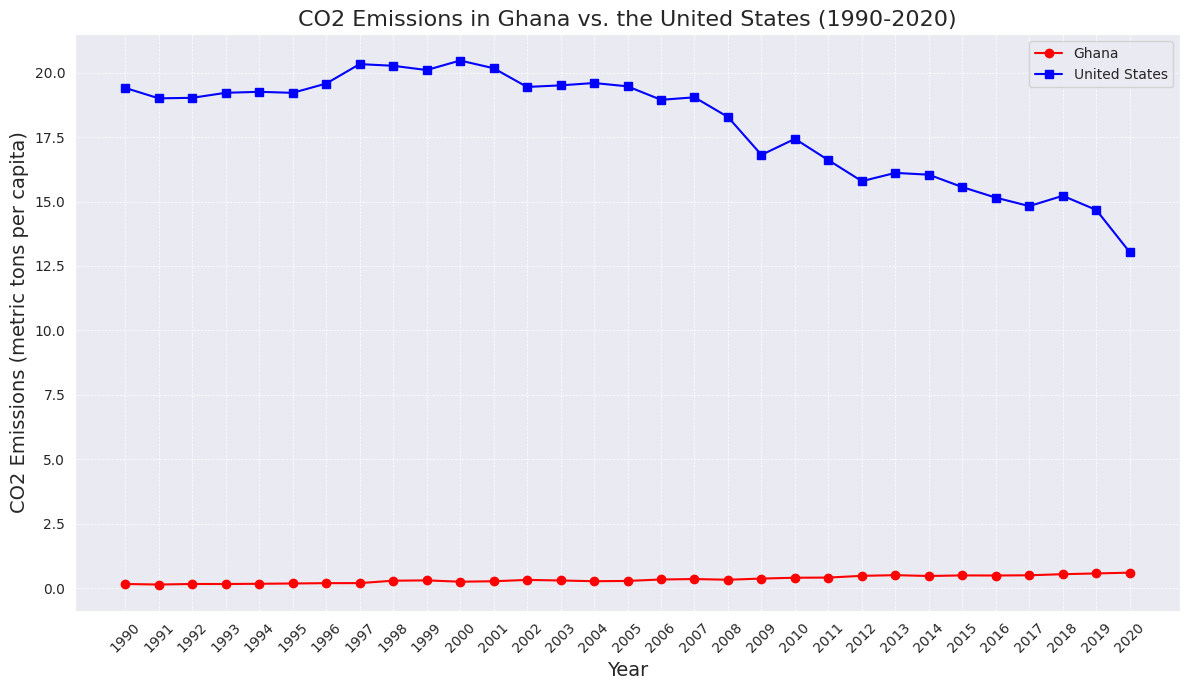

In [33]:
# Extracting emissions data for Ghana and the United States
ghana_us_emissions = imputed_data_full[imputed_data_full['Country Name'].isin(['Ghana', 'United States'])].iloc[:, 2:].transpose()
ghana_us_emissions.columns = imputed_data_full[imputed_data_full['Country Name'].isin(['Ghana', 'United States'])]['Country Name'].values

# Plotting the emissions data for Ghana and the United States
plt.figure(figsize=(12, 7))
plt.plot(ghana_us_emissions.index, ghana_us_emissions['Ghana'], marker='o', linestyle='-', color='red', label='Ghana')
plt.plot(ghana_us_emissions.index, ghana_us_emissions['United States'], marker='s', linestyle='-', color='blue', label='United States')
plt.title('CO2 Emissions in Ghana vs. the United States (1990-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## **Observations:**
- The United States, being a high-income country with a large industrial base, consistently shows higher CO2 emissions per capita compared to Ghana. This is expected due to the higher energy consumption associated with its industrial activities, transportation, and higher living standards.
- The emissions in the United States show some variation but remain relatively stable compared to the fluctuations observed in Ghana's emissions data. The stability in the U.S. emissions could be attributed to its advanced technology and energy efficiency measures that balance out the emissions despite economic growth. On the other hand, the fluctuations in Ghana's emissions might reflect changes in economic development phases, energy policy shifts, or variations in industrial activity.
- While both countries exhibit a general upward trend in emissions, the rate and pattern of increase differ. The United States shows a slight decrease in emissions towards the latter part of the timeline, which could be due to increased renewable energy use, improvements in energy efficiency, and environmental policies aimed at reducing carbon footprints.
- Ghana's emissions, while lower, show more pronounced growth in recent years, possibly due to rapid economic development and increased reliance on fossil fuels.

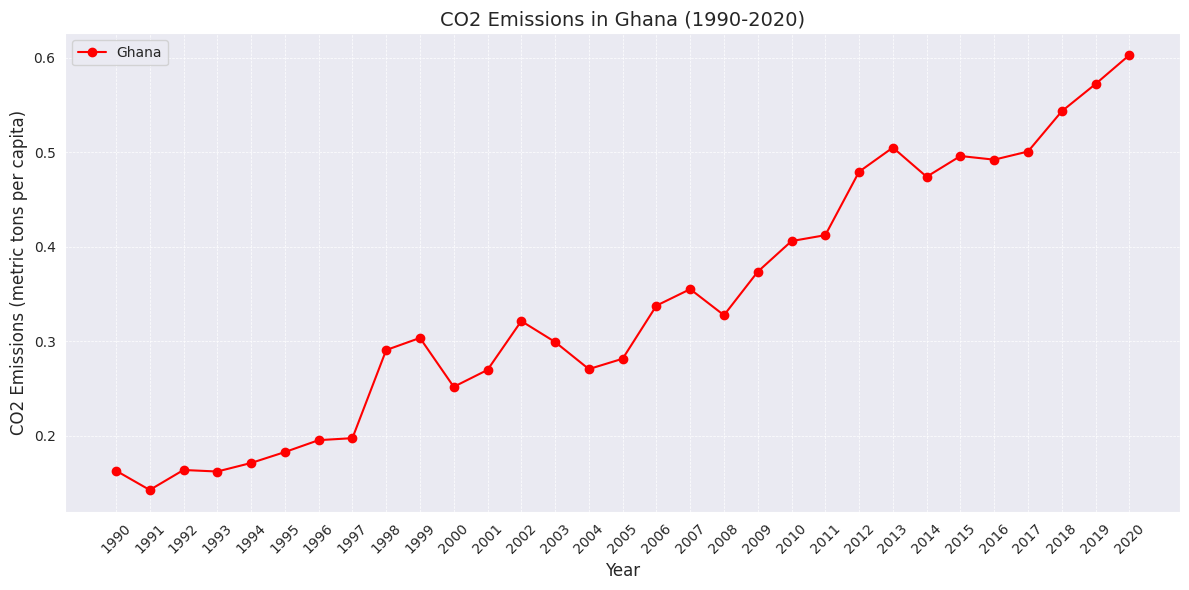

In [34]:
# Plotting the emissions data for Ghana only
plt.figure(figsize=(12, 6))
plt.plot(ghana_us_emissions.index, ghana_us_emissions['Ghana'], marker='o', linestyle='-', color='red', label='Ghana')
plt.title('CO2 Emissions in Ghana (1990-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## **The average CO2 emissions per capita from 1990 to 2020 for five different regions: Africa, Europe, Asia, South America, and North America.**

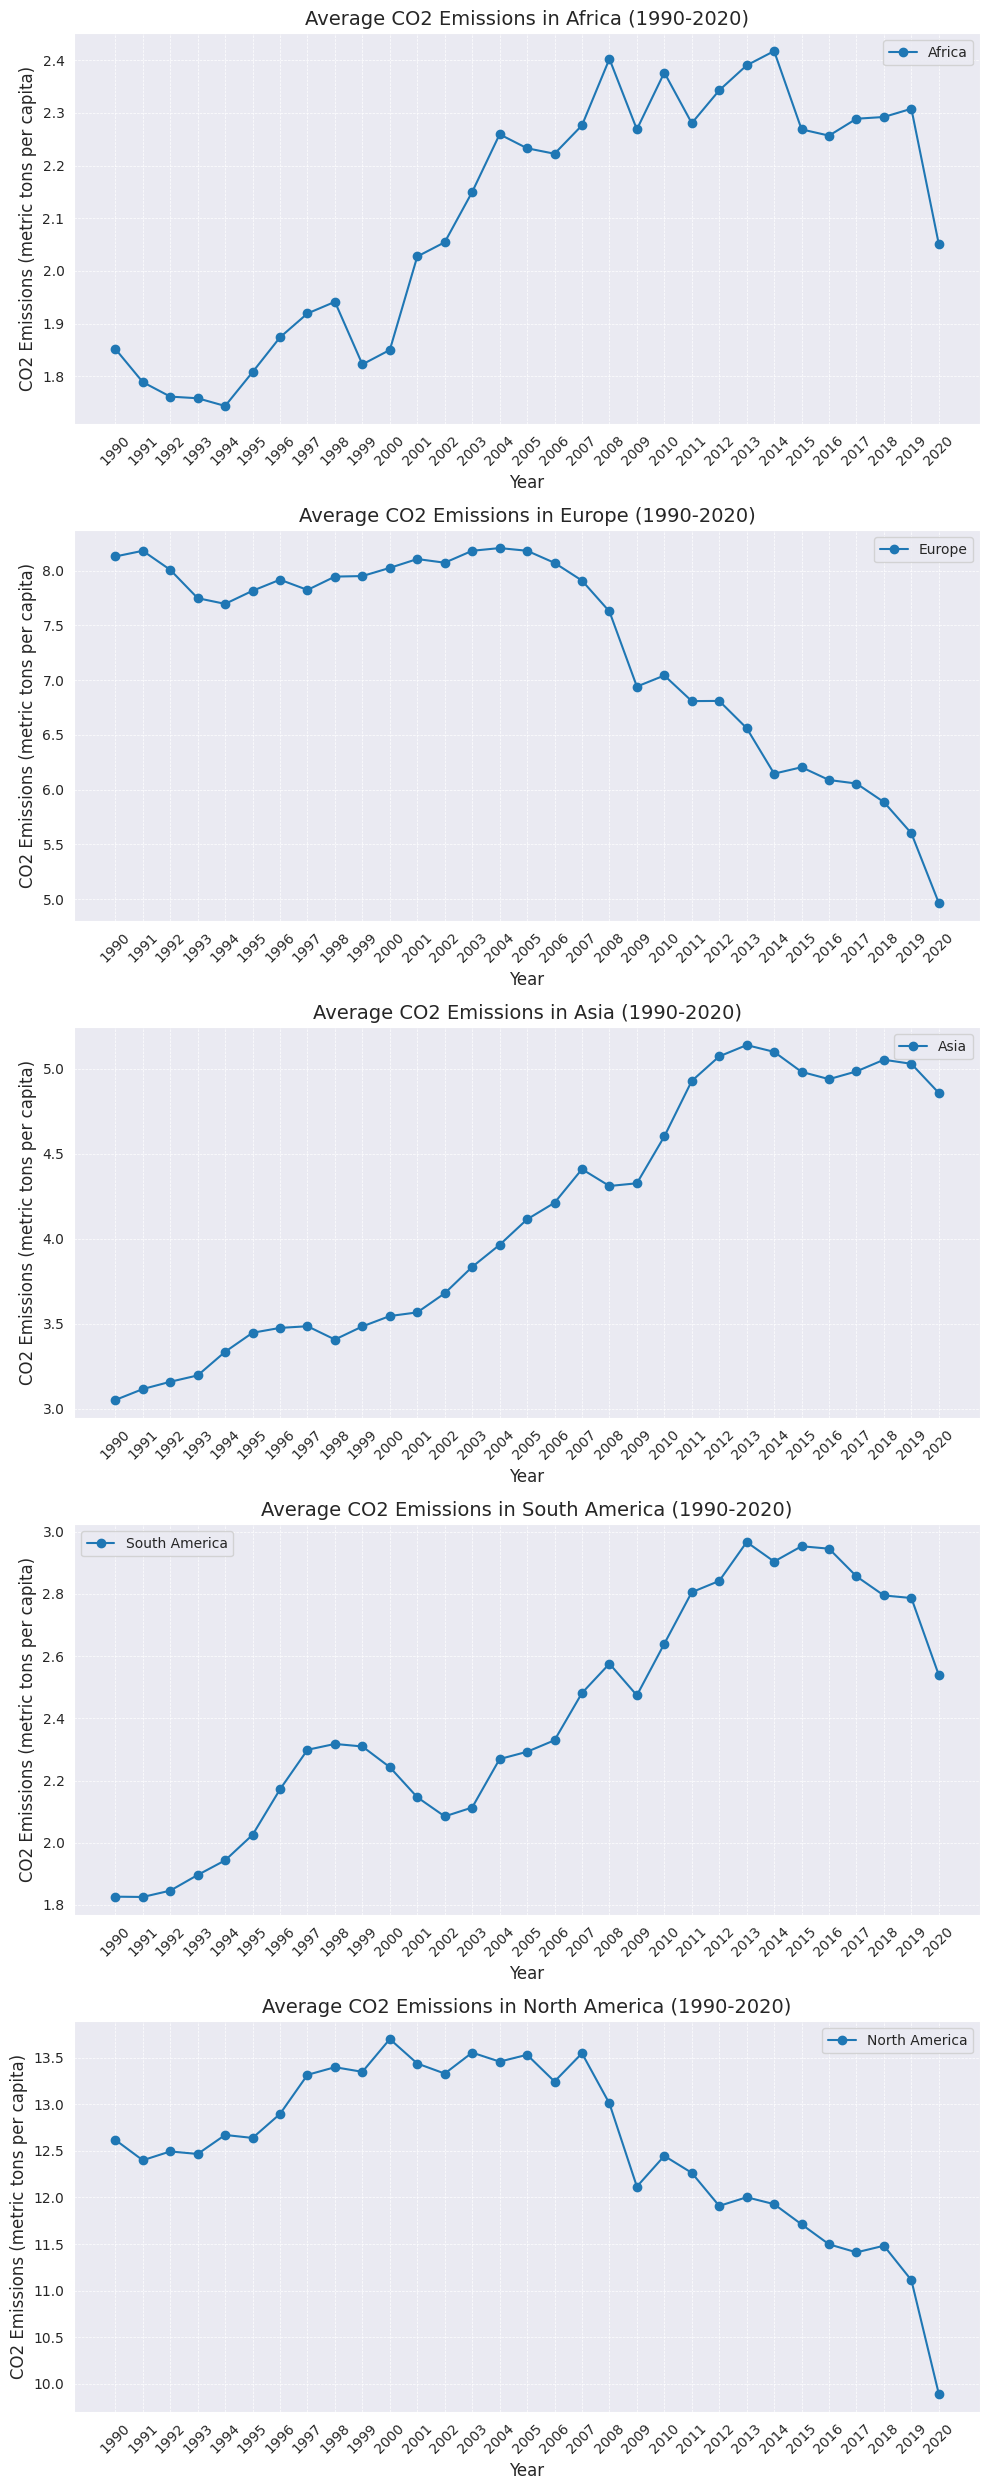

In [38]:
# Defining a simple mapping of countries to regions for the purpose of this analysis
# Note: This mapping is not exhaustive or perfectly accurate due to the simplistic approach
region_mapping = {
    'Africa': ['Nigeria', 'Ghana', 'Egypt', 'South Africa', 'Kenya'],
    'Europe': ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'],
    'Asia': ['China', 'India', 'Japan', 'South Korea', 'Indonesia'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Peru', 'Chile'],
    'North America': ['United States', 'Canada', 'Mexico']
}

# Initializing a figure for subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

# Looping through the region mapping to create a plot for each region
for i, (region, countries) in enumerate(region_mapping.items()):
    # Extracting emissions data for the countries in the current region
    region_data = imputed_data_full[imputed_data_full['Country Name'].isin(countries)].iloc[:, 2:].mean()

    # Plotting
    axs[i].plot(region_data.index, region_data.values, marker='o', linestyle='-', label=region)
    axs[i].set_title(f'Average CO2 Emissions in {region} (1990-2020)', fontsize=14)
    axs[i].set_xlabel('Year', fontsize=12)
    axs[i].set_ylabel('CO2 Emissions (metric tons per capita)', fontsize=12)
    axs[i].legend()
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i].set_xticklabels(region_data.index, rotation=45)  # Apply rotation to x-axis labels
plt.tight_layout()
plt.show()


## **Observations:**
- Africa shows relatively low emissions compared to other regions, reflecting the continent's lower levels of industrialization and energy consumption per capita.
- Europe exhibits a relatively stable or slightly decreasing trend in emissions, likely due to stringent environmental policies, investments in renewable energy, and efficiency improvements.
- Asia presents increasing emissions over time, driven by rapid industrialization and economic growth in countries like China and India.
- South America shows moderate emissions levels with some fluctuations, indicative of varied economic development stages and energy sources across the continent.
- North America, particularly with the inclusion of the United States and Canada, shows higher emissions per capita, although there might be a trend towards stabilization or reduction in recent years.

## **Performing cluster unsurpervised cluster analysis to group countries with similar emissions patterns.**

For the cluster analysis to group countries based on their CO2 emissions patterns over time, we'll use the K-means clustering algorithm

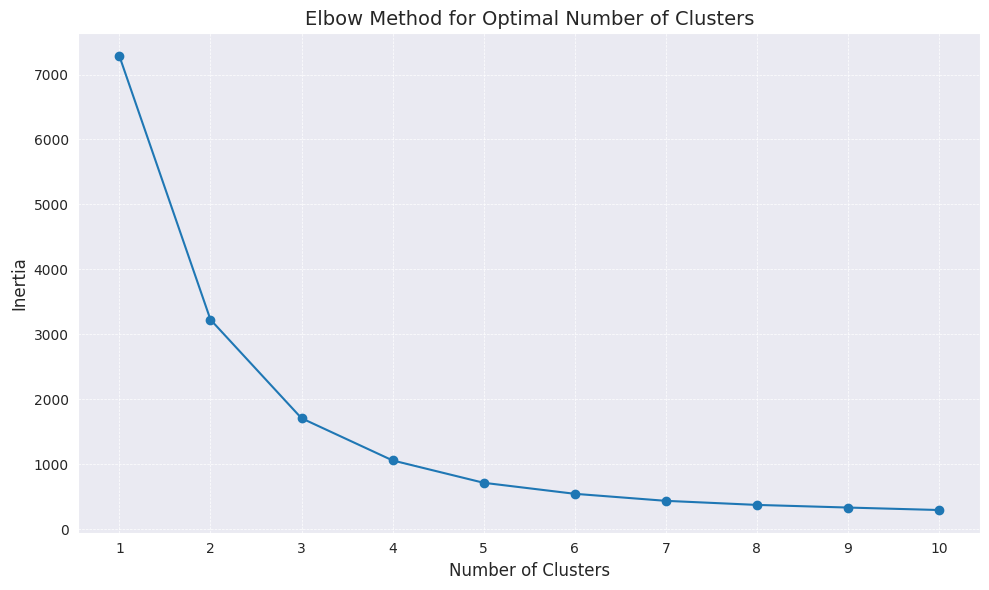

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Standardizing the emissions data (excluding country name and code for clustering)
emissions_data_for_clustering = imputed_data_full.drop(['Country Name', 'Country Code'], axis=1)
scaler = StandardScaler()
emissions_scaled = scaler.fit_transform(emissions_data_for_clustering)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(emissions_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The Elbow Method graph above illustrates how the inertia (or within-cluster sum of squares) decreases as the number of clusters increases. The "elbow" point, where the rate of decrease sharply changes, suggests the optimal number of clusters. In this case, the elbow appears around 3 to 4 clusters, indicating that grouping the countries into 3 or 4 clusters might provide a meaningful categorization based on their CO2 emissions patterns. We shall therefore proceed with k = 3.

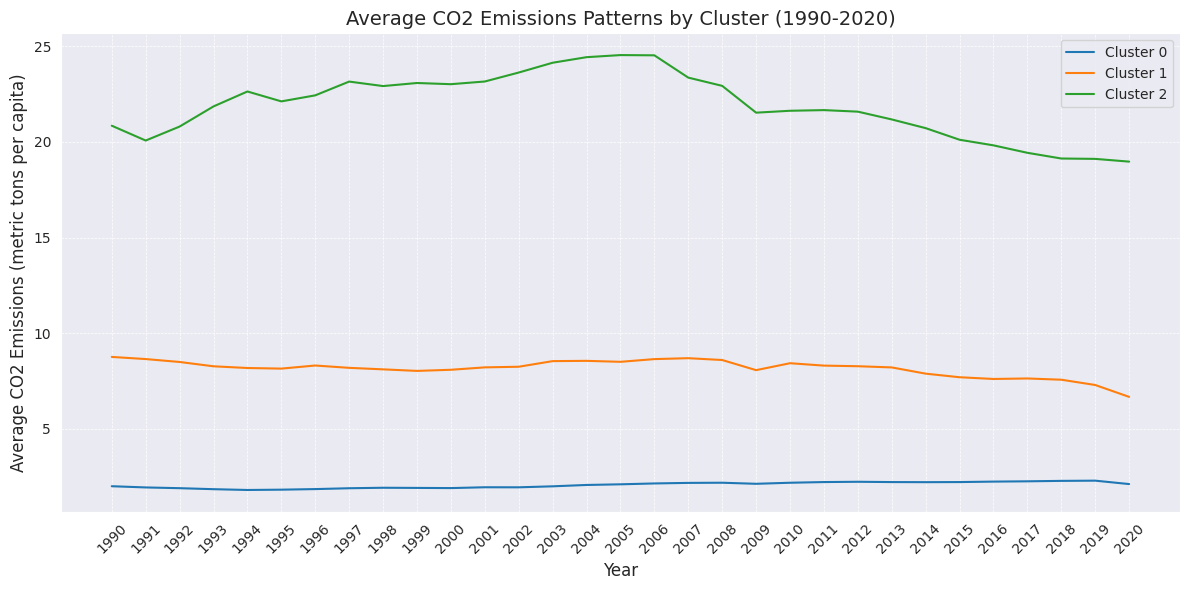

In [41]:
# Performing K-means clustering with the chosen number of clusters (3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(emissions_scaled)

# Adding the cluster labels to the original data
imputed_data_full['Cluster'] = clusters

# Analyzing the resulting clusters
# For simplicity, we'll visualize the average emissions patterns of countries within each cluster over time
plt.figure(figsize=(12, 6))

for cluster in sorted(imputed_data_full['Cluster'].unique()):
    cluster_data = imputed_data_full[imputed_data_full['Cluster'] == cluster].iloc[:, 2:-1].mean()
    sns.lineplot(x=cluster_data.index, y=cluster_data.values, label=f'Cluster {cluster}')

plt.title('Average CO2 Emissions Patterns by Cluster (1990-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average CO2 Emissions (metric tons per capita)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()


## **Observations:**

- **Cluster 0** shows a relatively stable emissions pattern with slight fluctuations over time. Countries in this cluster might be characterized by steady economic growth with moderate changes in emissions policies or energy consumption patterns.
- **Cluster 1** presents a noticeable upward trend in CO2 emissions, indicating countries whose emissions have been increasing over the past three decades. This could reflect rapid industrialization, increased reliance on fossil fuels, and significant economic development.
- **Cluster 2** demonstrates a pattern of initially higher emissions that either stabilize or decrease slightly over time. This might represent developed countries that have implemented effective emissions reduction policies or shifted towards cleaner energy sources.

## **Providing the final output of the dataframe with all the countries and their clusters**

In [43]:
# Creating a DataFrame to showcase the members of each cluster
cluster_members_df = imputed_data_full[['Country Name', 'Cluster']].copy()

# Sorting by cluster for a clearer overview
cluster_members_df = cluster_members_df.sort_values(by=['Cluster', 'Country Name'])

# Displaying the DataFrame
cluster_members_df.head(10)


,Country Name,Cluster
1,Afghanistan,0
3,Albania,0
58,Algeria,0
9,American Samoa,0
2,Angola,0
10,Antigua and Barbuda,0
5,Arab World,0
7,Argentina,0
8,Armenia,0
0,Aruba,0


# **Forcasting the CO2 emission for the USA using the ARIMA model**

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models are characterized by 3 terms: p, d, q.

- p is the order of the 'Auto Regressive' (AR) term. It refers to the number of lags of dependent variable to be used as predictors.

- d is the number of differencing required to make the time series stationary. If a time series has seasonal patterns, then you need to differencing it until it's stationary.

- q is the order of the 'Moving Average' (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


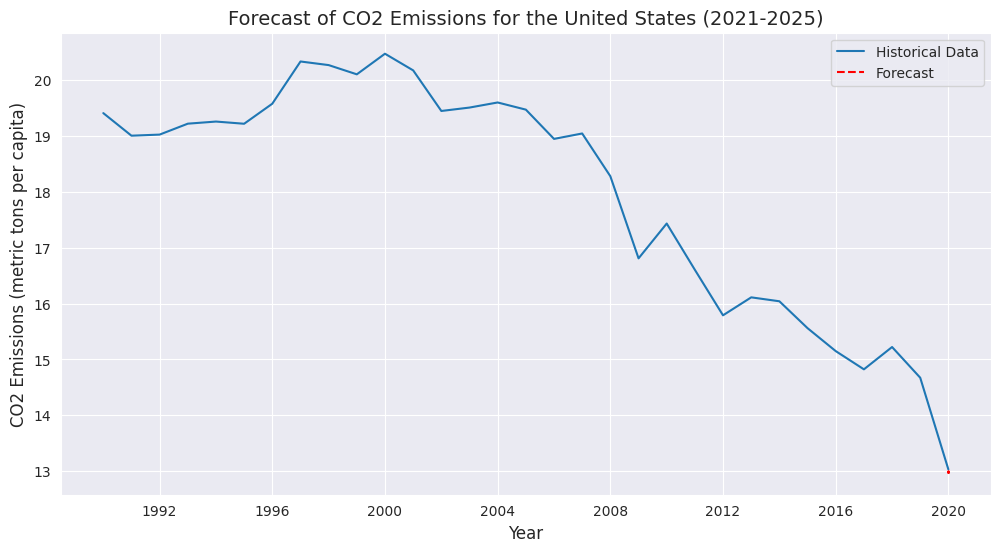

In [50]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Selecting the United States emissions data
us_emissions_series = imputed_data_full[imputed_data_full['Country Name'] == 'United States'].iloc[:, 2:-1].transpose()
us_emissions_series.columns = ['CO2 Emissions']
us_emissions_series.index = pd.to_datetime(us_emissions_series.index.astype(str), format='%Y')

# Fitting an ARIMA model - choosing parameters (p,d,q) can be done through ACF/PACF plots or auto-arima functions; we'll use a common set (1,1,1) for simplicity
model = ARIMA(us_emissions_series, order=(1,1,1))
model_fit = model.fit()

# Forecasting the next 5 years (2021-2025)
forecast = model_fit.forecast(steps=5)

# Plotting the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(us_emissions_series.index, us_emissions_series['CO2 Emissions'], label='Historical Data')
plt.plot(pd.date_range(start=us_emissions_series.index[-1], periods=6, closed='right'), forecast, label='Forecast', linestyle='--', color='red')
plt.title('Forecast of CO2 Emissions for the United States (2021-2025)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## **Observations:**

- The ARIMA model, configured with parameters (1,1,1), was used to forecast future emissions based on historical data. These parameters were chosen for simplicity, and further tuning could improve the model's accuracy.
- The forecast indicates that CO2 emissions per capita in the United States might continue to decrease slightly or stabilize in the coming years, consistent with the trend observed towards the end of the historical data.
- The model's projections are based on the assumption that past patterns and trends in the data will continue into the future. However, external factors such as policy changes, technological advancements, or economic shifts could significantly impact actual future emissions.

## **Decomposing the CO2 emissions data to identify seasonal patterns, trends, and residuals for USA.**

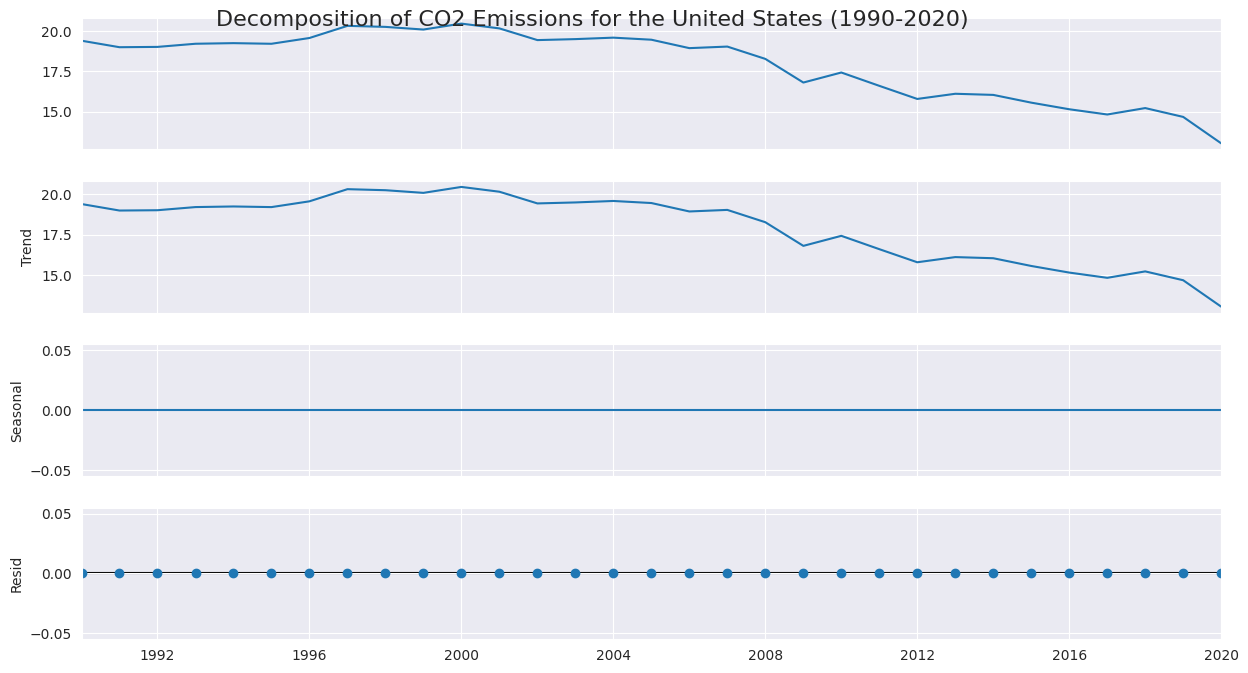

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the United States CO2 emissions data
decomposition = seasonal_decompose(us_emissions_series, model='additive', extrapolate_trend='freq')

# Plotting the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.suptitle('Decomposition of CO2 Emissions for the United States (1990-2020)', fontsize=16)
plt.show()

## **Observations:**

- **Trend:** This component shows the underlying trend in CO2 emissions over time. For the United States, there appears to be a gradual decrease in emissions per capita in the latter part of the time series, reflecting efforts towards more sustainable energy use and the adoption of cleaner technologies.

- **Seasonal:** Given the annual granularity of the data, the seasonal component does not show the kind of intra-year seasonal patterns one might see with monthly or daily data. Therefore, this component is relatively flat, as expected.

- **Residual:** The residuals represent the portion of the data that cannot be explained by the trend or seasonal components. It includes random fluctuations and any other patterns not captured by the model. For the United States, the residuals show some variability, indicating factors affecting emissions that are not captured by the long-term trend.